In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [2]:
# The dataset includes 2 million rows of comments that obtained the highest upvotes and scores in Reddit community.
df = pandas.read_csv("/Users/reneehu/Desktop/Content-Analysis-2020/week-4/comments_positive.csv")

# Using the entire dataset can be computationally heavy. In this assignment, I'll only apply the nltk methods 
# to the first 5000 rows.
small_df = df[:5000]
small_df.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0


In [5]:
nlp = spacy.load("en")
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [6]:
df_tokens = []
for i in small_df['text']:
    tokens = word_tokenize(i)
    df_tokens += tokens

In [7]:
df_tokens[10:20]

['and',
 'not',
 'your',
 'current',
 'activities',
 'Well',
 'it',
 'is',
 'exactly',
 'what']

In [8]:
import nltk
df_text = nltk.Text(df_tokens)
df_index = nltk.text.ConcordanceIndex(df_text) 
df_index.print_concordance('love')

Displaying 25 of 142 matches:
r be rid of my need for it I hate and love the box just as I hate and love mysel
e and love the box just as I hate and love myself Also what the fuck 2.7million 
s for all of the gold friends For the love of They are fighting an ideological b
ingle day tldr If you get a chance at love risk everything You let them vote the
or it at harvest time I say Jeez I 'd love to but I really need all the cash I c
y /r bandnames You 're both twisted I love it That guy just broke up with a vege
is that when you look for things like love meaning motivation it implies they ar
ze that in life they create their own love they manufacture their own meaning th
y goodness oh you Chris Nolan I would love to work with let me think I would lov
ove to work with let me think I would love to work with Alejandro González Iñárr
nzález Iñárritu I think those I would love to work with right off the top of my 
Edit Wow Gold highest rated comment I love you all P.S. French canada sucks Lab

In [9]:
df_text.common_contexts(['god'])

my_they edit_dammit oh_this my_it my_that deceased_that thy_hath
edit_i my_he oh_i checks_dammit fuck_i my_i dear_it my_a thank_i
good_my fashion_damn every_damn but_this


In [10]:
df_text.count('family')

65

/Users/reneehu/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/reneehu/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/reneehu/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/reneehu/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/reneehu/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecatio

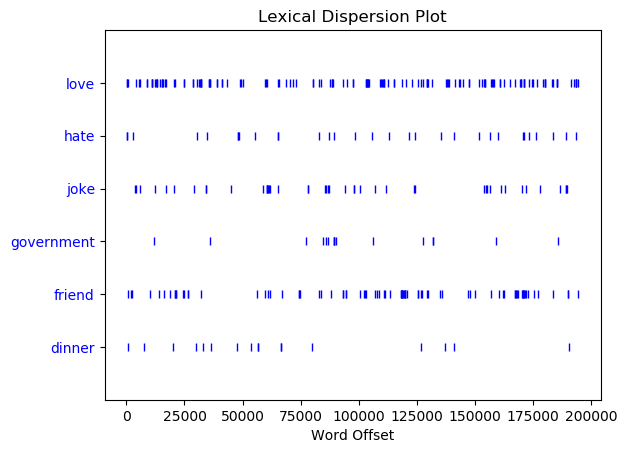

In [11]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
df_text.dispersion_plot(['love', 'hate', 'joke', 'government', 'friend', 'dinner'])
sns.set() #Re-enabling seaborn

Positive words such as "love" and "friend" occur quite often in the comments.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [12]:
small_df['tokenized_text'] = small_df['text'].apply(lambda x: word_tokenize(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
small_df['word_counts'] = small_df['tokenized_text'].apply(lambda x: len(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
small_df.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_text,word_counts
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0,"[This, is, n't, Twitter, try, to, comment, on,...",15
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0,"[Well, it, is, exactly, what, it, sounds, like...",338
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0,"[In, soviet, Russia, bomb, disarms, you]",6
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0,"[runin, for, senitur, YOLO]",4
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0,"[You, step, motherfucker]",3


In [15]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [16]:
countsDict = {}
for word in small_df['tokenized_text'].sum():
    if word not in stopwords:
        if word in countsDict:
            countsDict[word] += 1
        else:
            countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:30]

[('I', 5360),
 ("'s", 1767),
 ("n't", 1440),
 ('like', 819),
 ('The', 691),
 ('would', 638),
 ('one', 589),
 ("'m", 565),
 ('It', 536),
 ('You', 534),
 ('people', 522),
 ('get', 511),
 ('time', 463),
 ('Edit', 439),
 ("'re", 421),
 ('know', 394),
 ('And', 360),
 ('He', 347),
 ('That', 331),
 ('could', 329),
 ('think', 313),
 ('go', 303),
 ('This', 292),
 ('really', 282),
 ("'ve", 280),
 ('got', 273),
 ("'ll", 267),
 ('even', 264),
 ('see', 260),
 ('good', 259)]

In [17]:
# pick the cutoff at count 500
stop_words_freq = []
for word, count in word_counts:
    if word == 'time':
        break
    else:
        stop_words_freq.append(word)

In [18]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [19]:
small_df['normalized_tokens'] = small_df['tokenized_text'].apply(lambda x: normalizeTokens(x, extra_stop=stop_words_freq))
small_df['normalized_tokens_count'] = small_df['normalized_tokens'].apply(lambda x: len(x))
small_df.head()

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0,"[This, is, n't, Twitter, try, to, comment, on,...",15,"[twitt, try, comment, article, current, activity]",6
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0,"[Well, it, is, exactly, what, it, sounds, like...",338,"[exactly, sound, shoebox, masturbate, cum, ve,...",128
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0,"[In, soviet, Russia, bomb, disarms, you]",6,"[soviet, russia, bomb, disarm]",4
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0,"[runin, for, senitur, YOLO]",4,"[runin, senitur, yolo]",3
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0,"[You, step, motherfucker]",3,"[step, motherfucker]",2


### Conditional Frequency Distribution (condition: word length)

In [20]:
#.sum() adds together the lists from each row into a single list
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in small_df['normalized_tokens'].sum()))

#print the number of words
print(whcfdist.N())

81973


/Users/reneehu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12389 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/reneehu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/reneehu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12389 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/reneehu/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65377 missing from current font.
  font.set_text(s, 0, flags=flags)


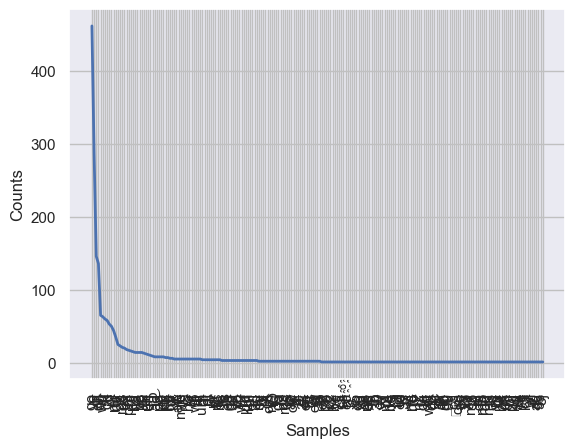

In [21]:
whcfdist[2].plot()

### Conditional Probability Distribution

In [22]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 5 letter word
print(whcpdist[5].max())

#And its probability
print(whcpdist[5].prob(whcpdist[5].max()))

think
0.033852425082003756


In [23]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [24]:
small_df['normalized_tokens_POS'] = [spacy_pos(t) for t in small_df['text']]

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Conditional Frequency Distribution (condition: number of occurrences)

In [25]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(small_df['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('this', FreqDist({'DT': 1446})),
 ('is', FreqDist({'VBZ': 2209, 'RB': 4})),
 ("n't", FreqDist({'RB': 1454})),
 ('twitter', FreqDist({'NN': 8, 'JJR': 4, 'JJ': 1})),
 (':', FreqDist({':': 1328, 'SYM': 2, '.': 1})),
 ('try', FreqDist({'VB': 65, 'VBP': 30, 'NN': 3, 'NNP': 1})),
 ('to', FreqDist({'TO': 3342, 'IN': 1487, 'RB': 1})),
 ('comment', FreqDist({'NN': 144, 'VB': 8, 'VBP': 2})),
 ('on', FreqDist({'IN': 1133, 'RP': 100, 'RB': 29, 'NN': 1})),
 ('the', FreqDist({'DT': 7683}))]

In [26]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in small_df['normalized_tokens_POS'].sum())

In [27]:
whcfdist_POStoWord['JJ']

FreqDist({'good': 285, 'other': 277, 'first': 173, 'many': 164, 'little': 160, 'few': 149, 'same': 140, 'old': 129, 'new': 129, 'great': 100, ...})

In [28]:
whcfdist_POStoWord['NN'].most_common(5)

[('edit', 551), ('time', 481), ('gold', 262), ('day', 231), ('guy', 228)]

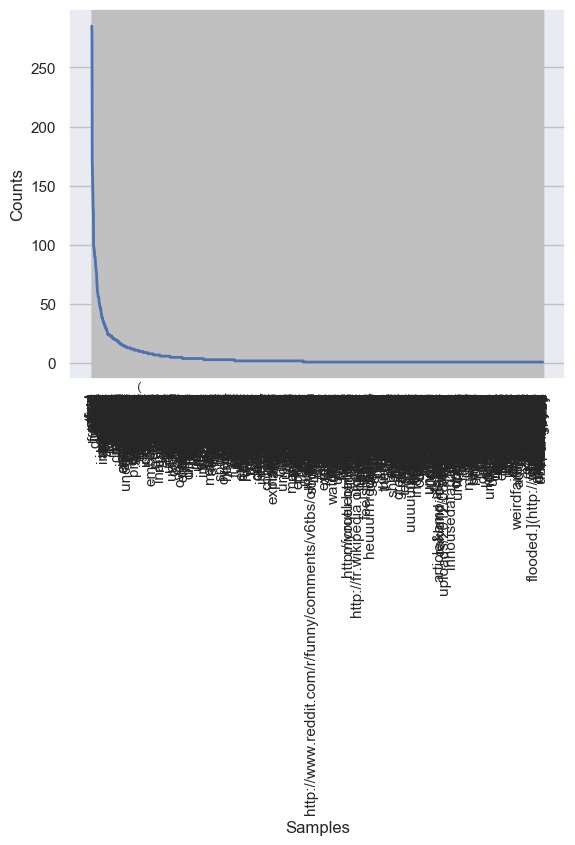

In [29]:
whcfdist_POStoWord['JJ'].plot()

In [30]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common adj
print(whcpdist_POStoWord['JJ'].max())

#And its probability
print(whcpdist_POStoWord['JJ'].prob(whcpdist_POStoWord['JJ'].max()))

good
0.021553676581609543


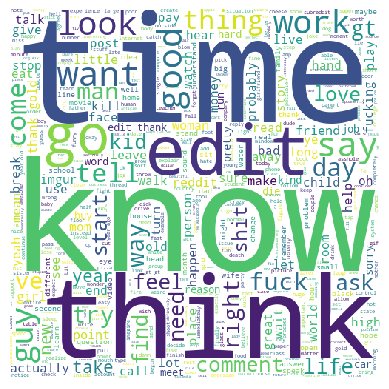

In [31]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(small_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("positive_comment_word_cloud.pdf", format = 'pdf')

The word cloud and word frequency distribution give us an exploratory peep into the dataset. After cleaning and normalizing the Reddit positive comments, the most frequent words are "think", "know", and "time". High frequent verbs include "want", "look", "edit", "tell", "say", "work", and the most frequent adj is "good". In general, these words indicate the presence of a thought-provoking and inspiring environment in the Reddit community. 

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [32]:
# 100 highest scoring posts
sub_df = small_df[:100]
sub_df.index = range(len(sub_df) - 1, -1,-1) #Reindex to make things nice in the future
sub_df.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
99,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0,"[This, is, n't, Twitter, try, to, comment, on,...",15,"[twitt, try, comment, article, current, activity]",6,"[(this, DT), (is, VBZ), (n't, RB), (twitter, J..."
98,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0,"[Well, it, is, exactly, what, it, sounds, like...",338,"[exactly, sound, shoebox, masturbate, cum, ve,...",128,"[(well, UH), (,, ,), (it, PRP), (is, VBZ), (ex..."
97,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0,"[In, soviet, Russia, bomb, disarms, you]",6,"[soviet, russia, bomb, disarm]",4,"[(in, IN), (soviet, NNP), (russia, NNP), (,, ,..."
96,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0,"[runin, for, senitur, YOLO]",4,"[runin, senitur, yolo]",3,"[("", ``), (runin, VB), (for, IN), (senitur, NN..."
95,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0,"[You, step, motherfucker]",3,"[step, motherfucker]",2,"[(you, PRP), (step, VBP), (motherfucker, NN), ..."


In [33]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    new_sent = ' '.join(sentences)
    new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [34]:
sub_df['POS_sents'] = sub_df['tokenized_text'].apply(lambda x: tag_sents_pos(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
sub_df['POS_sents'][:10]

99    [[(This, DT), (is, VBZ), (n't, RB), (Twitter, ...
98    [[(Well, UH), (it, PRP), (is, VBZ), (exactly, ...
97    [[(In, IN), (soviet, JJ), (Russia, NNP), (bomb...
96    [[(runin, VB), (for, IN), (senitur, JJ), (YOLO...
95      [[(You, PRP), (step, VBP), (motherfucker, NN)]]
94    [[(Is, VBZ), (n't, RB), (this, DT), (putting, ...
93                [[(WHAT, WP), (THE, DT), (FUCK, NN)]]
92    [[(because, IN), (i, PRP), (', ``), (m, NN), (...
91    [[(Dude, NNP), (This, DT), (is, VBZ), (bad, JJ...
90    [[(I, PRP), (also, RB), (find, VBP), (it, PRP)...
Name: POS_sents, dtype: object

In [36]:
countTarget = 'NN'
targetCounts = {}
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('world', 13),
 ('day', 11),
 ('m', 10),
 ('time', 10),
 ('life', 10),
 ('gold', 8),
 ('girl', 7),
 ('year', 7),
 ('wife', 6),
 ('reason', 5),
 ('person', 5),
 ('mom', 5),
 ('guy', 5),
 ('photo', 5),
 ('lot', 4),
 ('box', 4),
 ('anything', 4),
 ('chance', 4),
 ('front', 4),
 ('everything', 4)]

In [37]:
countTarget = 'VB'
targetCounts = {}
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('be', 24),
 ('have', 12),
 ('kill', 8),
 ('get', 7),
 ('do', 7),
 ('break', 6),
 ('take', 4),
 ('know', 4),
 ('Take', 3),
 ('meet', 3),
 ('ask', 3),
 ('make', 3),
 ('prove', 3),
 ('hear', 3),
 ('go', 3),
 ('throw', 2),
 ('destroy', 2),
 ('save', 2),
 ('call', 2),
 ('say', 2)]

In [38]:
countTarget = 'JJ'
targetCounts = {}
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('other', 21),
 ('many', 7),
 ('first', 7),
 ('new', 5),
 ('little', 5),
 ('same', 4),
 ('good', 4),
 ('important', 4),
 ('big', 4),
 ('dark', 4),
 ('old', 3),
 ('few', 3),
 ('high', 3),
 ('right', 3),
 ('short', 3),
 ('cruel', 3),
 ('much', 3),
 ('crazy', 3),
 ('whole', 3),
 ('current', 2)]

In [39]:
NTarget = 'JJ'
Word = 'time'
NResults = set()
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'precious', 'first', 'First'}


In [40]:
NTarget = 'JJ'
Word = 'life'
NResults = set()
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)   

{'high', 'whole', 'real'}


In [41]:
NTarget = 'JJ'
Word = 'wife'
NResults = set()
for entry in sub_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)   

{'pregnant'}


The conditional associations reveal quite positive sentiment. I specificlaly looked at ADJ associated with high-occurring nouns, and the associations revealed good positive vibes. The high-occuring verbs include some negative emotions -- it would be worth investigating the context of these verbs and the reason why they occur in future analysis.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [42]:
comment_bigrams = nltk.collocations.BigramCollocationFinder.from_words(small_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(comment_bigrams.N))

There are 81973 bigrams in the finder


In [45]:
def bigramScoring(count, wordsTuple, total):
    return count

print(comment_bigrams.nbest(bigramScoring, 10))

[('thank', 'gold'), ('edit', 'thank'), ('─', '─'), ('year', 'old'), ('m', 'go'), ('ve', 'get'), ('year', 'ago'), ('m', 'sorry'), ('gon', 'na'), ('gold', 'thank')]


In [51]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
comment_bigrams.score_ngrams(bigram_measures.student_t)[:30]

[(('thank', 'gold'), 10.377673715044317),
 (('edit', 'thank'), 9.66960328256245),
 (('─', '─'), 8.821544916021606),
 (('year', 'old'), 6.767693951654214),
 (('m', 'go'), 6.114107757365916),
 (('year', 'ago'), 6.046550751849395),
 (('ve', 'get'), 5.892928173741734),
 (('m', 'sorry'), 5.800168907648432),
 (('gon', 'na'), 5.654438943248468),
 (('gold', 'thank'), 5.359774267179044),
 (('holy', 'shit'), 5.265988533204821),
 (('=', '='), 4.964278481939175),
 (('high', 'school'), 4.857673063682233),
 (('minimum', 'wage'), 4.7933590505416435),
 (('edit', 'wow'), 4.694198138983118),
 (('kind', 'stranger'), 4.670024977294694),
 (('answer', 'question'), 4.656875003255755),
 (('m', 'sure'), 4.610881911468871),
 (('shrimp', 'tycoon'), 4.580935859639512),
 (('ve', 'see'), 4.443525113928102),
 (('good', 'friend'), 4.388494796299633),
 (('oh', 'god'), 4.3299718452853195),
 (('edit', 'holy'), 4.265409226317367),
 (('͡', '°'), 4.241605555871894),
 (('edit', 'gold'), 4.227045630318402),
 (('watch?v', '='

In [52]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
comment_trigrams = nltk.collocations.TrigramCollocationFinder.from_words(small_df['normalized_tokens'].sum())
comment_trigrams.score_ngrams(trigram_measures.student_t)[:30]

[(('edit', 'thank', 'gold'), 8.484190869081058),
 (('─', '─', '─'), 8.366588951640331),
 (('=', '=', '='), 4.795776550173984),
 (('gold', 'kind', 'stranger'), 3.6054632574364933),
 (('osama', 'bin', 'laden'), 3.4641014604805282),
 (('thank', 'gold', 'kind'), 3.4635306756451),
 (('edit', 'holy', 'shit'), 2.999640409428181),
 (('m', 'gon', 'na'), 2.8283911189365933),
 (('obligatory', 'thank', 'gold'), 2.8283522045445286),
 (('edit', 'obligatory', 'thank'), 2.8282467102899838),
 (('°', '͜ʖ', '͡'), 2.645751149069516),
 (('͜ʖ', '͡', '°'), 2.645751149069516),
 (('͡', '°', '͜ʖ'), 2.645751149069516),
 (('dundundundun', 'dundundundun', '^dundundundun'), 2.6457511374261204),
 (('dundundundun', 'dundundundun', 'dundundundun'), 2.6457507901491804),
 (('|', 'yrs', '|'), 2.64574999890449),
 (('thank', 'gold', 'stranger'), 2.645452296956895),
 (('m', 'pretty', 'sure'), 2.6452278221826373),
 (('^dundundundun', 'dundundundun', 'dundundundun'), 2.449489555232195),
 (('dundundundun', '^dundundundun', 'du

Since ngrams longer than 3 words do not produce meaningful combinations, and have much lower statistical significance than bigrams and trigrams. I only explored these two measures here.

The top bigrams fall into four categories: 1) emotion words, specifically the use of "gold" - "thank gold", "gold thank", "reddit gold", which could be a specific type of expression in Reddit community, 2) words related to time - "year old", "year ago", "high school" - these indicate that users are recalling a story from before, 3) verbs - "m go", "gon na", "ve see", "answer question" - also an indication of story telling, 4) interesting nouns - "minimum wage", "kind stranger", "shrimp tycoon", "good friend", "black hole". These are either hot topics people discuss or positive description of people around them.

Compared to bigrams, the words in trigrams are even more interesting. Top trigrams include "osma bin laden", "comparative price level" - very intuitive, hot topics in the community; emotion icons - cute expressions; and again, many occurrences of "strangers". It could be that there are many positive stories about kind strangers that people share in their comments, or it could also be that people are expressing gratitude to strangers that post in Reddit community. 

In [63]:
cooccur_time = []
for i in comment_bigrams.score_ngrams(bigram_measures.student_t):
    if 'time' in i[0]:
        cooccur_time.append(i)
cooccur_time[:10]

[(('long', 'time'), 3.49991495886672),
 (('time', 've'), 2.7191340820014167),
 (('spend', 'time'), 2.679514868715261),
 (('second', 'time'), 2.413484804246897),
 (('time', 'great'), 2.3195343071071552),
 (('time', 'think'), 2.0028594350784523),
 (('harvest', 'time'), 1.9792858624181133),
 (('lot', 'time'), 1.9477367415796933),
 (('time', 'go'), 1.936674270796482),
 (('waste', 'time'), 1.934405230990692)]

In [62]:
cooccur_life = []
for i in comment_bigrams.score_ngrams(bigram_measures.student_t):
    if 'life' in i[0]:
        cooccur_life.append(i)
cooccur_life[:10]

[(('real', 'life'), 3.389620028558268),
 (('rest', 'life'), 2.387858808274373),
 (('live', 'life'), 2.2914904379515133),
 (('new', 'life'), 2.283646500832211),
 (('entire', 'life'), 2.1796023032726106),
 (('day', 'life'), 2.1032359470882533),
 (('life', 'beautiful'), 1.9505934880997402),
 (('moment', 'life'), 1.917655813499567),
 (('shelf', 'life'), 1.7114495176639128),
 (('life', 'goal'), 1.697187086191245)]

As usual, I compared the combination of bigrams that include "time" and "life". The top co-occuring combinations in both bigrams express a positive sentiment.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

In [56]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    new_sent = ' '.join(sentences)
    new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [57]:
small_df['classified_sents'] = small_df['tokenized_text'].apply(lambda x: tag_sents_ner(x))
small_df['classified_sents'][:20]

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0                                                  [[]]
1     [[], [], [], [(two or three years, DATE)], [],...
2                                     [[(Russia, GPE)]]
3                                       [[(YOLO, ORG)]]
4                                                  [[]]
5                               [[(Descartes, PERSON)]]
6                                                  [[]]
7                                                  [[]]
8     [[(Dude This, PERSON)], [], [], [], [], [], []...
9                                    [[(72, CARDINAL)]]
10                                                 [[]]
11                                                 [[]]
12                                                 [[]]
13                                                   []
14                                             [[], []]
15                                             [[], []]
16                                                 [[]]
17                  [[(Jenny, PERSON), (Zack, PE

In [59]:
entityCounts = {}
for entry in small_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:30]

[('one', 233),
 ('first', 176),
 ('two', 100),
 ('2', 90),
 ('1', 65),
 ('3', 60),
 ('second', 50),
 ('today', 46),
 ('One', 45),
 ('three', 42),
 ('10', 37),
 ('4', 31),
 ('100', 30),
 ('half', 29),
 ('American', 26),
 ('Jesus', 24),
 ('Thor', 24),
 ('the day', 22),
 ('5', 22),
 ('OP', 21),
 ('US', 20),
 ('8', 19),
 ('America', 19),
 ('years', 19),
 ('Two', 17),
 ('four', 16),
 ('Jeff', 16),
 ('tomorrow', 15),
 ('20', 15),
 ('third', 15)]

In [69]:
OrgCounts = {}
for entry in small_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                if ent in OrgCounts:
                    OrgCounts[ent] += 1
                else:
                    OrgCounts[ent] = 1
sortedOrg = sorted(OrgCounts.items(), key = lambda x: x[1], reverse = True)
sortedOrg[:10]

[('OP', 21),
 ('TSA', 13),
 ('House', 12),
 ('MIT', 11),
 ('Annie', 11),
 ('TIL', 10),
 ('SRS', 10),
 ('EPA', 8),
 ('Time', 7),
 ('Google', 7)]

Manually calculating the precision, recall, and F-score for the organization counts. 7/10 of the top organization words are correct. We hand-tagged the dataset by ourselves, and according to the numbers:

True Positive: 7                                                                                                     
False Positive: 3                                                                                                    
False Negative: 5                                                                                                    
True Negative: 98                                                                                                    

Precision = True Positive / Positive = 7/10                                                                          
Recall = True Positive / (True Positive + False Negative) = 7/12                                                     
F = 2 * (precision * recall) / (precision + recall) = 0.636

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

In [144]:
from spacy import displacy
from spacy.symbols import nsubj, VERB, ADJ, NOUN, poss, amod, prep

In [146]:
for index, row in sub_df.iterrows():
    text = ' '.join(row['tokenized_text'])
    doc = nlp(text)
    for chunk in doc:
        if chunk.dep == poss and chunk.head.pos == ADJ:
            print(chunk.text, chunk.head.text)

your own
my first
my didliest
Their best
your stalker


In [140]:
amod_noun = {}
for index, row in sub_df.iterrows():
    text = ' '.join(row['tokenized_text'])
    amod_noun[row['ups']] = []
    doc = nlp(text)
    for chunk in doc:
        if chunk.dep == amod and chunk.head.pos == NOUN:
            amod_noun[row['ups']] = [chunk.text, chunk.head.text]

In [142]:
for key, value in amod_noun.items():
    if value != []:
        print(key, value)

9582 ['current', 'activities']
9531 ['fair', 'amount']
5704 ['masterful', 'manipulator']
5684 ['Worst', 'launderer']
5428 ['bland', 'reason']
5422 ['favorite', 'part']
5314 ['Russian', 'friend']
5178 ['short', 'shit']
5127 ['vicious', 'motherfucker']
5109 ['big', 'branches']
5080 ['giant', 'sheet']
5073 ['first', 'time']
5048 ['dressed', 'girl']
5031 ['extra', 'homework']
5019 ['saying', 'man']
5005 ['important', 'issue']
4944 ['good', 'friends']
4926 ['high', 'life']
4911 ['other', 'cars']
4904 ['21st', 'century']
4895 ['Blue', 'link']
4878 ['enough', 'internet']
4867 ['best', 'friend']
4864 ['greater', 'aplomb']
4836 ['top', 'comment']
4812 ['First', 'time']
4804 ['highest', 'comment']
4787 ['red', 'dies']
4761 ['wrong', 'thread']
4748 ['dark', 'spots']
4744 ['little', 'lid']
4733 ['limited', 'fonts']
4695 ['other', 'illnesses']
4690 ['based', 'regulations']
4688 ['other', 'dot']
4675 ['peaceful', 'existence']
4672 ['small', 'subset']
4657 ['strange', 'sentence']
4646 ['nice', 'guys'

In [147]:
prep_noun = {}
for index, row in sub_df.iterrows():
    text = ' '.join(row['tokenized_text'])
    prep_noun[row['ups']] = []
    doc = nlp(text)
    for chunk in doc:
        if chunk.dep == prep and chunk.head.pos == NOUN:
            prep_noun[row['ups']] = [chunk.text, chunk.head.text]

In [148]:
for key, value in prep_noun.items():
    if value != []:
        print(key, value)

9531 ['for', 'need']
5704 ['with', 'relationship']
5489 ['for', 'inflation']
5428 ['in', 'secret']
5422 ['of', 'part']
5354 ['with', 'dinner']
5332 ['of', 'portion']
5178 ['for', 'thanks']
5127 ['to', 'bends']
5109 ['of', 'bit']
5080 ['of', 'sheet']
5073 ['of', 'type']
5031 ['in', 'soldier']
5005 ['of', 'issue']
4926 ['of', 'density']
4904 ['of', 'lot']
4878 ['between', 'internet']
4874 ['for', 'Thanks']
4869 ['in', 'houses']
4812 ['in', 'shit']
4804 ['on', 'kiss']
4780 ['for', 'Thank']
4748 ['as', 'sunlight']
4744 ['like', 'cut']
4688 ['with', 'butt']
4675 ['of', 'tons']
4672 ['of', 'subset']
4657 ['for', 'Thanks']
4626 ['at', 'chance']
4583 ['of', 'front']


In [153]:
for index, row in sub_df.iterrows():
    text = ' '.join(row['tokenized_text'])
    doc = nlp(text)
    for chunk in doc:
        if chunk.dep == nsubj and chunk.head.pos == VERB:
            if chunk.head.text == 'think':
                print(chunk.text, chunk.head.text)

I think
I think
they think
I think
I think
I think
you think
me think
you think


In [156]:
for index, row in sub_df.iterrows():
    text = ' '.join(row['tokenized_text'])
    doc = nlp(text)
    for chunk in doc:
        if chunk.dep == nsubj and chunk.head.pos == VERB:
            if chunk.head.text == 'know':
                print(chunk.text, chunk.head.text)

upvotes know
I know


The comments in our dataset are mostly comprised of colloquial expressions, hence, do not have deep phrase structures and deeply nested dependency parse trees. We extracted combinations of words that involve the use of NOUN and VERB. ADJ-NOUN pairs occur the most in our dataset. The words in these pairs are mostly positive in sentiment, but diverse in topic. Some common themes include "friend", "day", "comment", etc. However, the combination itself does not reveal much information about the entities in the comments. For future analysis, We need to take into account of the context of these words and try to find the associations between these comments and the original post.

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

In [164]:
# Import another dataset that includes 2 million rows of comments that obtained the highest downvotes and scores 
# in Reddit community. The dataset is arranged in the order from the highest downvotes to the lowest downvotes.
# To obtain four separate dataset, I selected the first 5000 rows and the last 5000 rows of both positive and 
# negative comments dataset.

df_negative = pandas.read_csv("/Users/reneehu/Desktop/Content-Analysis-2020/week-4/comments_negative.csv")

positive_high = df[:5000]
positive_low = df[-5000:]
negative_high = df_negative[:5000]
negative_low = df_negative[-5000:]

In [160]:
negative_high.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0


In [163]:
negative_low.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
1995000,cneuouu,t1_cnet84b,t5_2qh3u,t3_2rcsu7,Give it a couple hours. The idiot with a fake ...,-6,-6,IHateShaneBattier,0,t3_2rcsu7,No one is being demonized here.,30,30,Fudada,0
1995001,c3zvwh0,t1_c3zvsyi,t5_2qh0s,t3_qr9vv,"&gt;I'm not hating at you, just pointing out t...",-6,-6,Hellzapoppin,0,t3_qr9vv,Lemme just quote from the sidebar.\n\n&gt;How ...,7,7,credence,0
1995002,c49m09n,t1_c49lvpw,t5_2qh03,t3_rxrxw,You shouldn't have bought tickets to pax if yo...,-6,-6,[deleted],0,t3_rxrxw,"Im over £1000 out of pocket, I have a shit loa...",2,2,[deleted],0
1995003,c52v1mn,t1_c52tj5a,t5_2qh0u,t3_va4s5,"I call bullshit, give me some kind of source f...",-6,-6,TheProven,0,t3_va4s5,"Firstly, I would like to remind everyone that ...",37,37,0_-,0
1995004,c1t6lhf,t1_c1t6689,t5_2qh03,t3_h7f7j,I would spray-shit on that paiting if it were ...,-6,-6,[deleted],0,t3_h7f7j,would hang the shit out of that painting.\n,60,60,[deleted],0


In [167]:
positive_high['tokenized_text'] = positive_high['text'].apply(lambda x: word_tokenize(x))
positive_high['normalized_tokens'] = positive_high['tokenized_text'].apply(lambda x: normalizeTokens(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
positive_low['tokenized_text'] = positive_low['text'].apply(lambda x: word_tokenize(x))
positive_low['normalized_tokens'] = positive_low['tokenized_text'].apply(lambda x: normalizeTokens(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [169]:
negative_high['tokenized_text'] = negative_high['text'].apply(lambda x: word_tokenize(x))
negative_high['normalized_tokens'] = negative_high['tokenized_text'].apply(lambda x: normalizeTokens(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [170]:
negative_low['tokenized_text'] = negative_low['text'].apply(lambda x: word_tokenize(x))
negative_low['normalized_tokens'] = negative_low['tokenized_text'].apply(lambda x: normalizeTokens(x))

/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/reneehu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [171]:
pos_high_words = set(positive_high['normalized_tokens'].sum())
pos_low_words = set(positive_low['normalized_tokens'].sum())
neg_high_words = set(negative_high['normalized_tokens'].sum())
neg_low_words = set(negative_low['normalized_tokens'].sum())

overlapWords = pos_high_words & pos_low_words & neg_high_words & neg_low_words

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['time']

2339

In [173]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

pos_highProbArray = makeProbsArray(positive_high['normalized_tokens'], overlapWordsDict)
pos_lowProbArray = makeProbsArray(positive_low['normalized_tokens'], overlapWordsDict)
neg_highProbArray = makeProbsArray(negative_high['normalized_tokens'], overlapWordsDict)
neg_lowProbArray = makeProbsArray(negative_low['normalized_tokens'], overlapWordsDict)

pos_lowProbArray.sum()

1.0

### KL Divergence

In [174]:
pos_divergence = scipy.stats.entropy(pos_highProbArray, pos_lowProbArray)
print(pos_divergence)
neg_divergence = scipy.stats.entropy(neg_highProbArray, neg_lowProbArray)
print(neg_divergence)
high_divergence = scipy.stats.entropy(pos_highProbArray, neg_highProbArray)
print(high_divergence)
low_divergence = scipy.stats.entropy(pos_lowProbArray, neg_lowProbArray)
print(low_divergence)

0.14274471610482609
0.18597327784022777
0.27292154015379955
0.158963359335536


In [176]:
# between positive_high and negative_high
high_divergence_ew = scipy.special.kl_div(pos_highProbArray, neg_highProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = high_divergence_ew
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
2575,downvote,0.009175
1891,gay,0.006773
3143,gold,0.004413
2741,post,0.002723
2243,karma,0.002184
3148,cheese,0.002009
3661,comment,0.001889
416,lol,0.001767
134,door,0.001668
2664,fuck,0.001639


In [177]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [178]:
corpora = [positive_high, positive_low, negative_high, negative_low]

In [184]:
fileids = ['Most Upvoted Comments', 'Least Upvoted Comments', 'Most Downvoted Comments', 'Least Downvoted Comments']

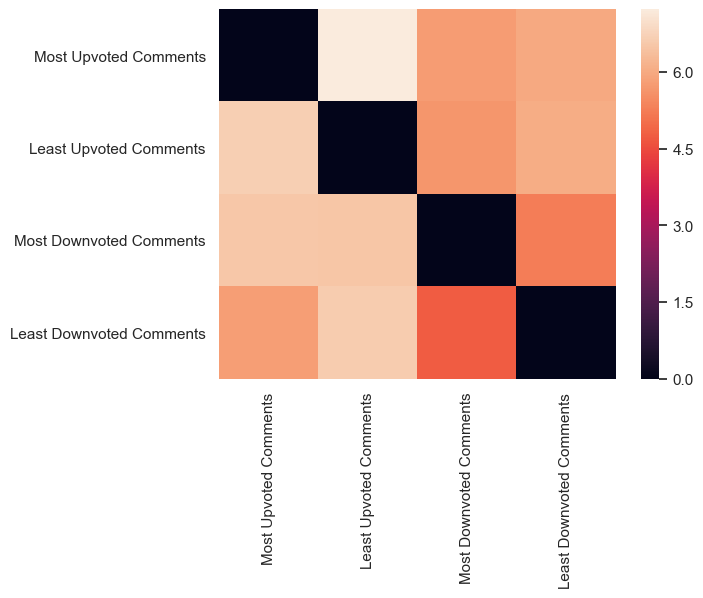

In [185]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p['text'],q['text'], difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### $\chi^2$ Divergence

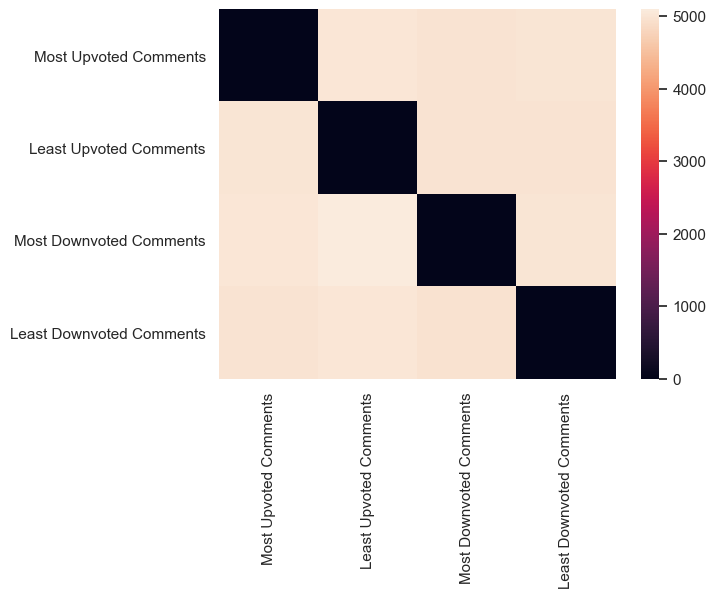

In [188]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p['text'],q['text'], difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### KS Distance

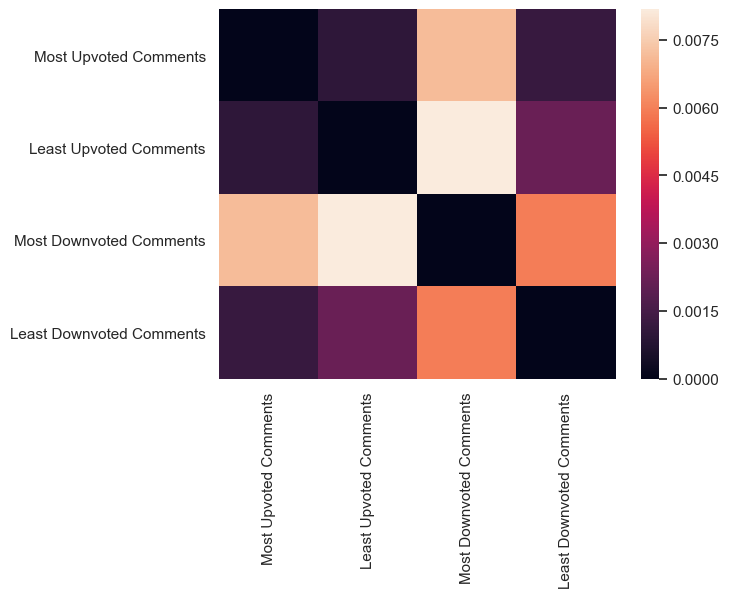

In [190]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p['text'],q['text'], difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### Wasserstein Distance

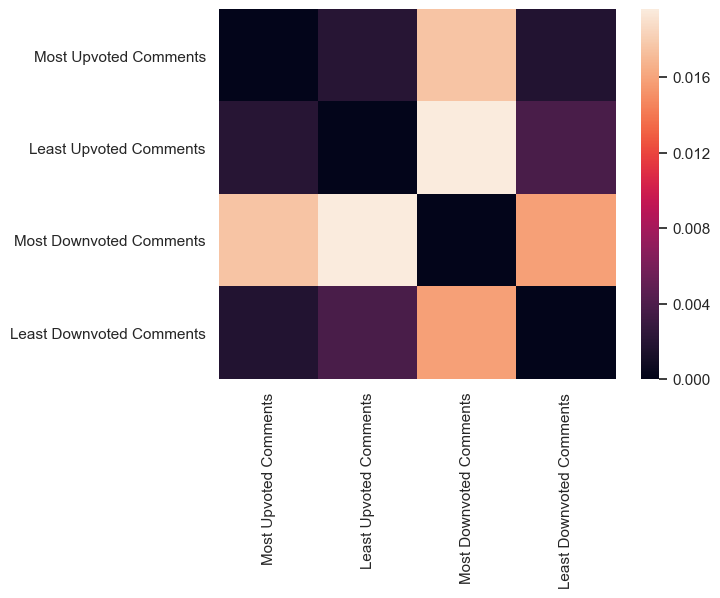

In [191]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p['text'],q['text'], difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

### Multidimensional Scaling

/Users/reneehu/anaconda3/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


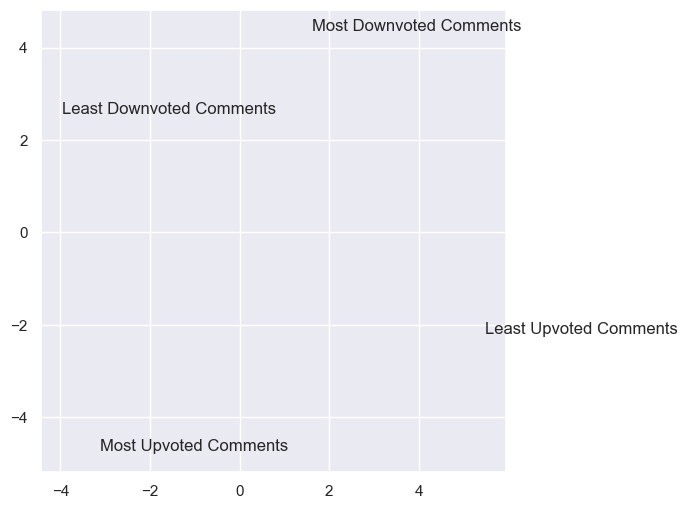

In [186]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

### Jensen-Shannon Divergence

In [195]:
posJSD = scipy.spatial.distance.jensenshannon(pos_highProbArray, pos_lowProbArray)
print(posJSD)
negJSD = scipy.spatial.distance.jensenshannon(neg_highProbArray, neg_lowProbArray)
print(negJSD)
highJSD = scipy.spatial.distance.jensenshannon(pos_highProbArray, neg_highProbArray)
print(highJSD)
lowJSD = scipy.spatial.distance.jensenshannon(pos_lowProbArray, neg_lowProbArray)
print(lowJSD)

0.18277300518493417
0.20639111240519192
0.2551953814393443
0.19297767622057768


JS Divergence computes the average KL divergence between each distribution and the average of both distribution, producing a symmetric matrix.

KL divergence captures the differences between documents better than $\chi^2$ divergences. The latter shows that all documents are highly divergent from each other, while the former is able to refine the divergence more accurately. KS and Wasserstein distances produce similar results, and both methods distinguish the documents pretty well. In general, the most upvoted comments and the least upvoted comments are quite similar to each other, so do the most downvoted and the least downvoted comments. However, the most downvoted comments and the most upvoted comments differ a lot more in their text, and the difference is successfully captured by the analysis.